# Operadores morfológicos

## 1. Erosão

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def erosion(img, elem_est, origin):
    '''Erosão de uma imagem binária img utilizando o elemento
       estruturante elem_est. A origem do elemento estruturante
       é indicada pelo ponto origin'''

    num_rows, num_cols = img.shape
    num_rows_ee, num_cols_ee = elem_est.shape
    
    # Armazena as coordenadas do elemento estruturante
    set_ee = []
    for row in range(num_rows_ee):
        for col in range(num_cols_ee):
            if elem_est[row, col]==1:
                set_ee.append((row-origin[0], col-origin[1]))
    
    img_res = np.zeros_like(img)
    for row in range(num_rows):
        for col in range(num_cols):
            z = (row, col)
            is_contained = contained(img, set_ee, z)
            if is_contained:
                img_res[row, col] = 1
                
    return img_res

def contained(img, set_ee, z):
    '''Verifica se os pontos contidos no conjunto 
       set_ee, transladados de uma quantia z, mapeiam 
       todos para um pixel branco na imagem img'''

    for point in set_ee:
        # Translada o ponto
        trans_point = (point[0]+z[0], point[1]+z[1])
        # Se o ponto estiver fora da imagem, retorna Falso
        if trans_point[0]<0 or trans_point[0]>=img.shape[0] or \
           trans_point[1]<0 or trans_point[1]>=img.shape[1]:
            return False
        
        if img[trans_point]==0:
                return False
    return True

In [2]:
def imshow_with_grid(img):
    '''Plota imagem junto com uma grade para facilitar a visualização dos pixels'''
    plt.imshow(img, 'gray')
    plt.xticks(np.arange(-0.5, img.shape[1]+0.5))
    plt.yticks(np.arange(-0.5, img.shape[0]+0.5))
    plt.grid()

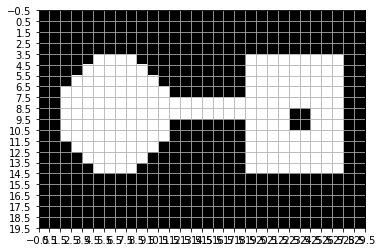

In [3]:
img = plt.imread('shape.tiff')
# A imagem está no intervalo [0, 255], o comando abaixo é utilizado
# para transformar a imagem para o tipo bool [False, True]
img = img>0
imshow_with_grid(img)

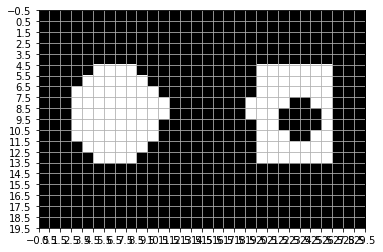

In [4]:
# Elemento estruturante
elem_est = np.array([[0, 1, 0],
                     [1, 1, 1],
                     [0, 1, 0]])

img_res = erosion(img, elem_est, origin=(1, 1))
imshow_with_grid(img_res)

## 2. Dilatação

In [5]:
def dilation(img, elem_est, origin):
    '''Dilatação de uma imagem binária img utilizando o elemento
       estruturante elem_est. A origem do elemento estruturante
       é indicada pelo ponto origin'''

    num_rows, num_cols = img.shape
    num_rows_ee, num_cols_ee = elem_est.shape
    
    # Armazena as coordenadas do elemento estruturante. As coordenadas
    # são refletidas, de acordo com a definição de dilatação
    set_ee = []
    for row in range(num_rows_ee):
        for col in range(num_cols_ee):
            if elem_est[row, col]==1:
                set_ee.append((origin[0]-row, origin[1]-col))
    
    img_res = np.zeros_like(img)
    for row in range(num_rows):
        for col in range(num_cols):
            z = (row, col)
            has_intersect = intersects(img, set_ee, z)
            if has_intersect:
                img_res[row, col] = 1
                
    return img_res 

def intersects(img, set_ee, z):
    '''Verifica se algum ponto do conjunto set_ee, transladado 
       de uma quantia z, mapeia para um pixel branco na imagem img'''

    for point in set_ee:
        # Translada o ponto
        trans_point = (point[0]+z[0], point[1]+z[1])
        # Verifica ponto somente se ele estiver dentro da imagem
        if trans_point[0]>=0 and trans_point[0]<img.shape[0] and \
           trans_point[1]>=0 and trans_point[1]<img.shape[1]:
        
            if img[trans_point]==1:
                return True
    return False

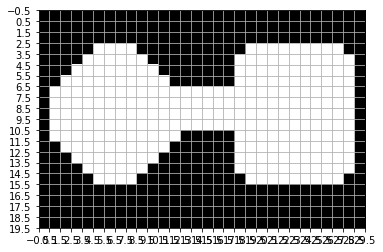

In [6]:
elem_est = np.array([[0, 1, 0],
                     [1, 1, 1],
                     [0, 1, 0]])

img_res = dilation(img, elem_est, origin=(1, 1))
imshow_with_grid(img_res)

## 3. Abertura e fechamento

In [7]:
def opening(img, elem_est, origin):
    img_eroded = erosion(img, elem_est, origin)
    img_opened = dilation(img_eroded, elem_est, origin)
    
    return img_opened

def closing(img, elem_est, origin):
    img_dilated = dilation(img, elem_est, origin)
    img_closed = erosion(img_dilated, elem_est, origin)
    
    return img_closed

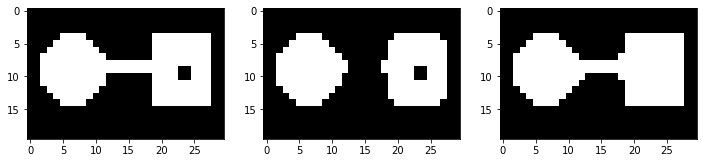

In [8]:
img_opened = opening(img, elem_est, (1,1))
img_closed = closing(img, elem_est, (1,1))

plt.figure(figsize=[12, 5])
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.subplot(1, 3, 2)
plt.imshow(img_opened, 'gray')
plt.subplot(1, 3, 3)
plt.imshow(img_closed, 'gray')